<a href="https://colab.research.google.com/github/muthiawidya/Try-Machine-Learning/blob/main/Salinan_Cabutlah_Contoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [ ]:
df = pd.read_csv('/content/aaa.csv')
df.head()

,index,nama,vote_average,vote_count,type,htm_weekday,htm_weekend,latitude,longitude,description
0,0,Candi Borobudur,4.7,81922,sejarah,50000.0,NaN,-7.607087,110.203623,Candi yang pernah masuk sebagai salah satu dar...
1,1,Candi Prambanan,4.7,71751,sejarah,50000.0,NaN,-7.751835,110.491532,Candi Prambanan adalah kompleks candi Hindu te...
2,2,Tebing Breksi,4.4,51431,alam,10000.0,NaN,-7.781477,110.504576,Tebing Breksi merupakan tempat wisata yang ber...
3,3,Gembira Loka Zoo,4.5,36337,buatan,20000.0,25000.0,-7.806234,110.396798,Gambira Loka adalah kebun binatang yang berada...
4,4,The Palace of Yogyakarta (Keraton Yogyakarta),4.6,30091,sejarah,8000.0,NaN,-7.805284,110.364203,Kompleks keraton merupakan museum yang menyimp...


In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

htm_weekend    40
htm_weekday     5
description     0
longitude       0
latitude        0
dtype: int64

In [ ]:
X=df.loc[:,['nama','latitude','longitude']]
X.head()

,nama,latitude,longitude
0,Candi Borobudur,-7.607087,110.203623
1,Candi Prambanan,-7.751835,110.491532
2,Tebing Breksi,-7.781477,110.504576
3,Gembira Loka Zoo,-7.806234,110.396798
4,The Palace of Yogyakarta (Keraton Yogyakarta),-7.805284,110.364203


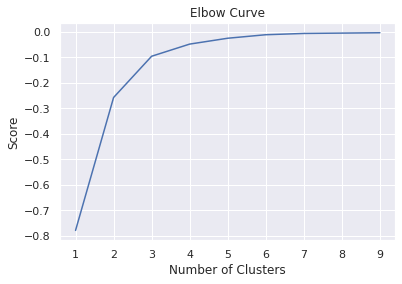

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,nama,latitude,longitude,cluster_label
0,Candi Borobudur,-7.607087,110.203623,0
1,Candi Prambanan,-7.751835,110.491532,0
2,Tebing Breksi,-7.781477,110.504576,0
3,Gembira Loka Zoo,-7.806234,110.396798,0
4,The Palace of Yogyakarta (Keraton Yogyakarta),-7.805284,110.364203,0
5,Taman Sari,-7.809833,110.359512,0
6,Hutan Pinus Mangunan Dlingo,-7.926784,110.431997,0
7,Jogja Bay,-7.747846,110.418875,0
8,The World Landmarks - Merapi Park Yogyakarta,-7.620905,110.421627,0
9,The Lost World Castle,-7.604165,110.451004,0


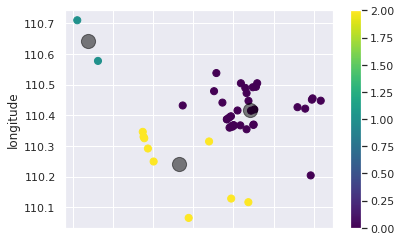

In [ ]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)